In [2]:
import re
import pandas as pd
import numpy as np

In [18]:
import requests
from bs4 import BeautifulSoup
page = requests.get('https://www.unicode.org/emoji/charts/full-emoji-modifiers.html')
soup = BeautifulSoup(page.content, 'html.parser')

In [20]:
rows = soup.table.find_all('tr')

In [21]:
emojis = []
unicode_vals = []
for row in rows:
    try:
        cells = row.find_all('td')
        unicode_vals.append(cells[1].find('a').get('name'))
        emojis.append(cells[2].text)
    except Exception as e:
        print(e)

list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out o

In [22]:
print(emojis[:10])

['👋🏻', '👋🏼', '👋🏽', '👋🏾', '👋🏿', '🤚🏻', '🤚🏼', '🤚🏽', '🤚🏾', '🤚🏿']


In [23]:
print(unicode_vals[:10])

['1f44b_1f3fb', '1f44b_1f3fc', '1f44b_1f3fd', '1f44b_1f3fe', '1f44b_1f3ff', '1f91a_1f3fb', '1f91a_1f3fc', '1f91a_1f3fd', '1f91a_1f3fe', '1f91a_1f3ff']


In [24]:
b = '\U0001F970'
print(b == '🥰')

True


In [25]:
print(b)

🥰


In [2]:
%cd emojinsp

/Users/Antonio/emojinsp


In [5]:
v = pd.read_csv('data/multi_emoji/emoji_nsp_dataset_multi_emoji.csv')
x = pd.read_csv('data/full_data/emoji_nsp_dataset.csv')
y = pd.read_csv('data/no_repeats/emoji_nsp_dataset_no_repeats.csv')
z = pd.read_csv('data/single_emoji/emoji_nsp_dataset_single_emoji.csv')

In [13]:
def print_random_sentence(df):
    sent = df.iloc[np.random.choice(df.index)]
    print(sent.tweets)
    print(sent.emoji_sentence)
    print(sent['follows?'])
    
def show_quantiles(df, column, emoji=False):
    '''
    function used for exploratory analysis, mainly to determine
    max sentence length for text component of tweets
    '''
    df = df.dropna().copy()
    percentiles = [0.5, 0.75, 0.95, 1]
    print('Percentiles for: {}'.format(column))
    for i in percentiles:
        if emoji:
            print('{}th percentile: {}'.format(i*100 ,df[column].map(lambda x: len(list(x))).quantile(q = i)))
        else:
            print('{}th percentile: {}'.format(i*100 ,df[column].map(lambda x: len(x.split(' '))).quantile(q = i)))


In [112]:
print_random_sentence(v)

HAHAHA  it’s Bc I drank vodka 
🏎🏎🚀
0


In [18]:
show_quantiles(x, 'tweets')

Percentiles for: tweets
50.0th percentile: 11.0
75.0th percentile: 18.0
95.0th percentile: 43.0
100th percentile: 227.0


In [19]:
show_quantiles(x, 'emoji_sentence', emoji=True)

Percentiles for: emoji_sentence
50.0th percentile: 1.0
75.0th percentile: 1.0
95.0th percentile: 4.0
100th percentile: 224.0


In [20]:
show_quantiles(y, 'tweets')

Percentiles for: tweets
50.0th percentile: 11.0
75.0th percentile: 18.0
95.0th percentile: 43.0
100th percentile: 227.0


In [21]:
show_quantiles(y, 'emoji_sentence', emoji=True)

Percentiles for: emoji_sentence
50.0th percentile: 1.0
75.0th percentile: 1.0
95.0th percentile: 3.0
100th percentile: 71.0


In [22]:
show_quantiles(z, 'tweets')

Percentiles for: tweets
50.0th percentile: 10.0
75.0th percentile: 16.0
95.0th percentile: 37.0
100th percentile: 200.0


In [23]:
show_quantiles(z, 'emoji_sentence', emoji=True)

Percentiles for: emoji_sentence
50.0th percentile: 1.0
75.0th percentile: 1.0
95.0th percentile: 1.0
100th percentile: 3.0


In [16]:
show_quantiles(v, 'tweets')

Percentiles for: tweets
50.0th percentile: 15.0
75.0th percentile: 27.0
95.0th percentile: 51.0
100th percentile: 227.0


In [17]:
show_quantiles(v, 'emoji_sentence', emoji=True)

Percentiles for: emoji_sentence
50.0th percentile: 3.0
75.0th percentile: 3.0
95.0th percentile: 10.0
100th percentile: 132.0


### Even distribution of classes (shuffled vs. non-shuffled )

In [4]:
v['follows?'].value_counts()

1    12126
0    12126
Name: follows?, dtype: int64

In [5]:
x['follows?'].value_counts()

1    53328
0    53328
Name: follows?, dtype: int64

In [6]:
y['follows?'].value_counts()

1    53328
0    53328
Name: follows?, dtype: int64

In [7]:
z['follows?'].value_counts()

1    41202
0    41202
Name: follows?, dtype: int64

In [8]:
x.dropna(inplace = True)
y.dropna(inplace = True)
z.dropna(inplace = True)
v.dropna(inplace = True)

In [8]:
v.head()

,tweets,emoji_sentence,follows?
0,Anyone interested in buying my Astro Dream Pt....,💵🚚💜🏷,1
1,"[210319] 6:11AM KSTTo me it’s goodnight,,, to ...",🐶🥲😴,1
2,[USER] I have so many captions they’re so inap...,🤣😅,1
3,Raetwt really experienced the biggest meltdown...,🤣🤡🤡,1
4,[USER] [USER] NEGATIVE! GO GREEN,🤣💚💚💚,1


### Split data into train-val-test (70:10:20)

In [10]:
def get_splits(df, train_percent=.7, validate_percent=.1, seed=None, filename=None):
    # generate shuffled indices using seed
    np.random.seed(seed)
    shuffled_idx = np.random.permutation(df.index.values)
    df = df.iloc[shuffled_idx]
    df.reset_index(inplace=True)
    df = df.iloc[:24000]
    # determine indices for partitioning df
    rows = len(df.index)
    train_idx = int(train_percent * rows)
    validate_idx = int(validate_percent * rows) + train_idx
    # return df splits
    train = df.loc[:train_idx]
    validate = df.loc[train_idx:validate_idx]
    test = df.loc[validate_idx:]
    
    train.to_csv(filename + '_train.csv', index = False)
    validate.to_csv(filename + '_valid.csv', index = False)
    test.to_csv(filename + '_test.csv', index = False)

In [11]:
get_splits(x, seed = 1, filename = 'data/full_data/emoji_nsp_dataset')
get_splits(y, seed = 2, filename = 'data/no_repeats/emoji_nsp_dataset_no_repeats')
get_splits(z, seed = 3, filename = 'data/single_emoji/emoji_nsp_dataset_single_emoji')
get_splits(v, seed = 4, filename = 'data/multi_emoji/emoji_nsp_dataset_multi_emoji')

In [2]:
a = pd.read_csv('data/multi_emoji/emoji_nsp_dataset_multi_emoji_train.csv')
b = pd.read_csv('data/full_data/emoji_nsp_dataset_train.csv')
c = pd.read_csv('data/no_repeats/emoji_nsp_dataset_no_repeats_train.csv')
d = pd.read_csv('data/single_emoji/emoji_nsp_dataset_single_emoji_train.csv')

In [33]:
c['follows?'].value_counts()

0    7762
1    7713
Name: follows?, dtype: int64

In [34]:
b['follows?'].value_counts()

1    7844
0    7696
Name: follows?, dtype: int64

In [35]:
c['follows?'].value_counts()

0    7762
1    7713
Name: follows?, dtype: int64

In [36]:
d['follows?'].value_counts()

1    7571
0    7444
Name: follows?, dtype: int64

In [37]:
a.head()

,index,tweets,emoji_sentence,follows?
0,6704,good morning [USER] you woke up so early anyw...,😶😊💚,1
1,10651,MVP 4x Scoring champ 3x All NBA FIRST TEAM 3...,✅✅✅✅,1
2,6345,[USER] Your tears baby boy ...Sleep sad,🌚🌚👌,1
3,5268,15 php ---&gt; Follow [USER] ---&gt; RT &amp; ...,💗📌,1
4,5897,this emoji looks like sia,😭🍙🍙🍙🍙🍙🍙🍙🍙🍙🍙🍙🍙🍙🍙🍙🍙🍙🍙🍙🍙🍙,1


In [19]:
(a.head()['tweets'] + a.head()['emoji_sentence']).str.len().max()

94

### exploring emoji usage/ distribution

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:

for key, value in Counter(list(a['emoji_sentence'].head().values[0])).items():
    print(key)

😶
😊
💚


In [11]:
from collections import defaultdict, Counter
def get_emoji_counts(df):
    counter = defaultdict(int)
    for sentence in df['emoji_sentence'].values:
        for key, value in Counter(list(sentence)).items():
            counter[key] += value
    return counter

In [12]:
multi_count = get_emoji_counts(a)
full_count = get_emoji_counts(b)
single_count = get_emoji_counts(d)
no_repeat_count = get_emoji_counts(c)

In [16]:
sorted(no_repeat_count.items(), key=lambda pair: pair[1], reverse=True)[:100]

[('😂', 1142),
 ('😭', 1011),
 ('\U0001f97a', 628),
 ('🤣', 459),
 ('♀', 425),
 ('🙏', 421),
 ('🏻', 399),
 ('♂', 376),
 ('🏽', 355),
 ('🏾', 353),
 ('\U0001f970', 337),
 ('🤷', 335),
 ('🙄', 301),
 ('😍', 286),
 ('👀', 278),
 ('🤔', 278),
 ('🤦', 261),
 ('🏼', 257),
 ('❤', 257),
 ('😌', 256),
 ('😩', 256),
 ('😊', 243),
 ('👍', 239),
 ('😔', 228),
 ('💀', 215),
 ('\U0001f974', 203),
 ('🔥', 198),
 ('✨', 198),
 ('😅', 197),
 ('\U0001f972', 193),
 ('💕', 190),
 ('💯', 185),
 ('😁', 180),
 ('💜', 167),
 ('😉', 162),
 ('😎', 144),
 ('💙', 141),
 ('😳', 135),
 ('🙌', 132),
 ('🙃', 130),
 ('😏', 129),
 ('\U0001f90d', 123),
 ('😆', 117),
 ('😘', 116),
 ('💔', 116),
 ('🙂', 112),
 ('💗', 111),
 ('👏', 109),
 ('😒', 109),
 ('😈', 108),
 ('💪', 108),
 ('🤗', 103),
 ('\U0001f973', 100),
 ('💖', 99),
 ('🤝', 99),
 ('\U0001f928', 98),
 ('😐', 97),
 ('👇', 96),
 ('😤', 94),
 ('😬', 90),
 ('\U0001f929', 85),
 ('🤞', 84),
 ('😞', 83),
 ('😢', 83),
 ('😋', 79),
 ('👌', 78),
 ('\U0001f92a', 76),
 ('📌', 76),
 ('🤡', 71),
 ('😃', 69),
 ('🇸', 69),
 ('😫', 68),


In [8]:
def plot_distribution(counts):
    df = pd.DataFrame(sorted(counts.items(), key=lambda pair: pair[1], reverse=True)[:100], 
                      columns = ['emoji', 'usage'])
    fig = plt.figure(figsize = (16, 12))
    sns.barplot(x=df['emoji'], y=df['usage'])
    plt.show()

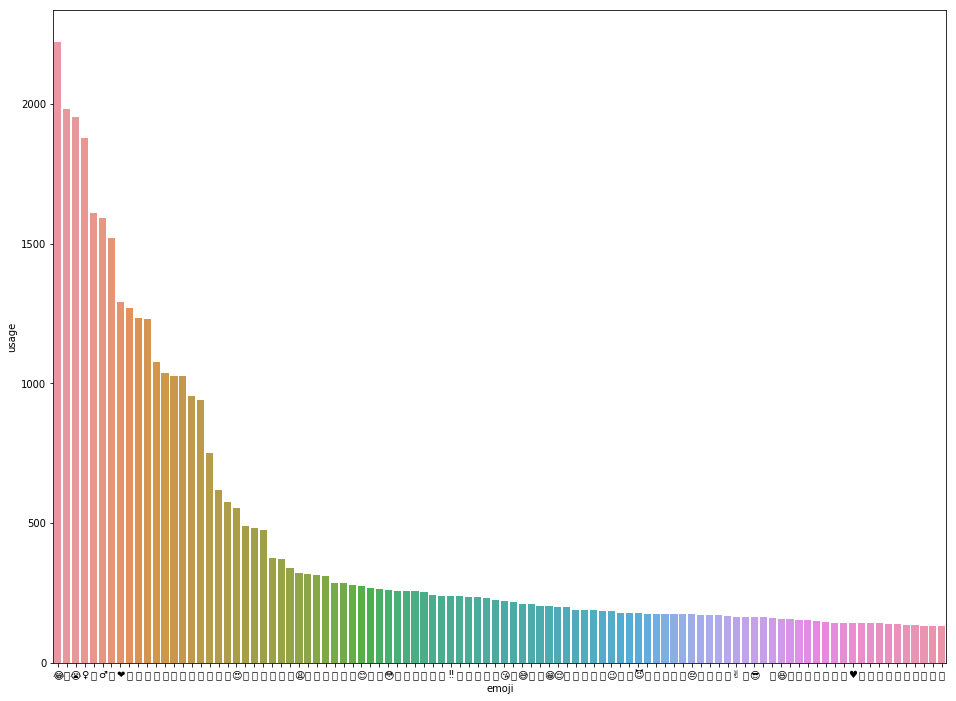

In [12]:
plot_distribution(multi_count)